In [33]:
import tensorflow as tf

In [34]:
from tensorflow import keras

In [35]:
import numpy as np

In [36]:
import matplotlib.pyplot as plt

In [37]:
print(tf.__version__)

1.14.0


In [38]:
fashion_data = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

In [39]:
f_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
                 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [40]:
train_images.shape

(60000, 28, 28)

In [41]:
train_labels.shape

(60000,)

In [42]:
test_images.shape

(10000, 28, 28)

In [43]:
test_labels.shape

(10000,)

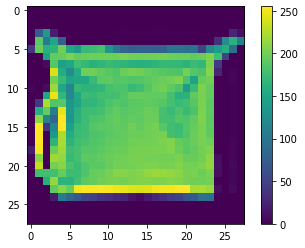

In [44]:
import random
# Randomly display a train image
plt.figure()
plt.imshow(train_images[random.randint(0, 60000)])
plt.colorbar()
plt.grid(False)
plt.show()

In [45]:
# Processing the images so all values are between 0 and 1
# This will aid the neural network in training and predictions
train_images = train_images / 255.0
test_images = test_images / 255.0

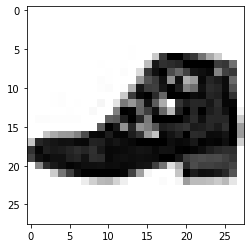

In [46]:
# Randomly display a train image with the new values between 0 and 1
plt.imshow(train_images[random.randint(0, 60000)], cmap=plt.cm.binary)
plt.grid(False)
plt.show()

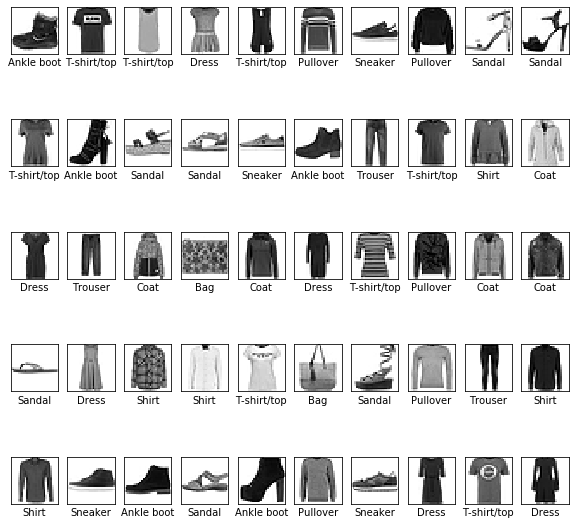

In [47]:
# Display 50 images from the train set with their labels
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(f_class_names[train_labels[i]])
plt.show()

In [48]:
# Building the model
# Setting up the layers and structure using Keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [49]:
# Compiling the model
# Setting the optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
# Training the model on train_data 
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.4945 - acc: 0.8268
Epoch 2/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3739 - acc: 0.8636
Epoch 3/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.3369 - acc: 0.8763
Epoch 4/5
60000/60000 [==============================] - 1s 25us/sample - loss: 0.3143 - acc: 0.8842
Epoch 5/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2959 - acc: 0.8905


In [51]:
# Evaluate the model with test data and determine accuracy
# Want to make sure we are not overfitting during training
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Total Test Accuracy: {test_accuracy * 100:.3f}%")

10000/10000 [==============================] - 0s 15us/sample - loss: 0.3740 - acc: 0.8630
Total Test Accuracy: 86.300%


In [52]:
# Make predictions using the predict function
# This will give a prediction for each image in the testing set
model_predictions = model.predict(test_images)
print(model_predictions)
model_predictions[0]
np.argmax(model_predictions[0])
f_class_names[np.argmax(model_predictions[0])]

[[2.7436799e-06 7.0560907e-07 8.6830092e-08 ... 3.1634316e-02
  3.5704397e-06 9.6599156e-01]
 [1.6698417e-05 2.2806881e-09 9.9917233e-01 ... 9.5443948e-16
  4.3839517e-08 2.3415962e-13]
 [2.0437560e-07 9.9999964e-01 6.6588879e-10 ... 1.6916654e-17
  3.3967357e-10 4.1354568e-14]
 ...
 [3.2921407e-02 3.2382798e-07 3.1447443e-03 ... 3.0155097e-06
  9.5936280e-01 1.0542568e-08]
 [1.0472970e-07 9.9995339e-01 1.1419453e-08 ... 1.9794002e-11
  1.7305534e-09 2.9598476e-07]
 [3.9380724e-05 5.8336741e-07 5.3977426e-05 ... 2.0733308e-02
  1.9952992e-03 1.4414902e-04]]


'Ankle boot'

In [53]:
# Printing the class names of each prediction (first 50)
for i in range(50):
    class_name = f_class_names[np.argmax(model_predictions[i])]
    print('Prediction ' + str(i + 1) + ': ' + str(class_name))

Prediction 1: Ankle boot
Prediction 2: Pullover
Prediction 3: Trouser
Prediction 4: Trouser
Prediction 5: Shirt
Prediction 6: Trouser
Prediction 7: Coat
Prediction 8: Shirt
Prediction 9: Sandal
Prediction 10: Sneaker
Prediction 11: Coat
Prediction 12: Sandal
Prediction 13: Sandal
Prediction 14: Dress
Prediction 15: Pullover
Prediction 16: Trouser
Prediction 17: Pullover
Prediction 18: Pullover
Prediction 19: Bag
Prediction 20: T-shirt/top
Prediction 21: Pullover
Prediction 22: Sandal
Prediction 23: Sneaker
Prediction 24: Sandal
Prediction 25: Trouser
Prediction 26: Pullover
Prediction 27: Shirt
Prediction 28: T-shirt/top
Prediction 29: Ankle boot
Prediction 30: Dress
Prediction 31: Bag
Prediction 32: Bag
Prediction 33: Dress
Prediction 34: Dress
Prediction 35: Bag
Prediction 36: T-shirt/top
Prediction 37: Sneaker
Prediction 38: Sandal
Prediction 39: Sneaker
Prediction 40: Ankle boot
Prediction 41: T-shirt/top
Prediction 42: Trouser
Prediction 43: Shirt
Prediction 44: Sneaker
Prediction

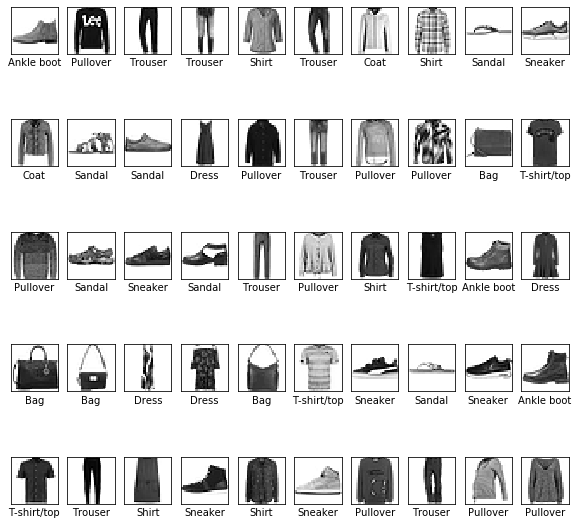

In [54]:
# Print 50 images and classes from predictions
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap = plt.cm.binary)
    plt.xlabel(f_class_names[np.argmax(model_predictions[i])])
plt.show()